## Processing of cell aggregates

Built from ground up, but based on common workflow of
1. Detect edges
2. Threshold detected edges
3. Get rid of small things
4. Fill in detected regions

CM

# imports

In [53]:
import numpy as np
import skimage.io as skio
import matplotlib.pyplot as plt
from skimage.color import (rgb2gray, label2rgb)
from skimage.filters import (gaussian, laplace, threshold_otsu)
from skimage.morphology import (remove_small_objects, binary_opening, disk)
from skimage.measure import label
from skimage.segmentation import mark_boundaries
from scipy.ndimage import binary_fill_holes

## functions

In [54]:
# Istack = skio.imread('20230217 kinetix hyperbollic/fitc1 1ms fastest001 10sp.tif', plugin='tifffile')

# data_0 = processEdgeFill(Istack, cropThres=[375, 470], mmPerPixel=mmPerPixel, diskDia=6, Dmin=0, Dmax=0.3)


Final region boundaries


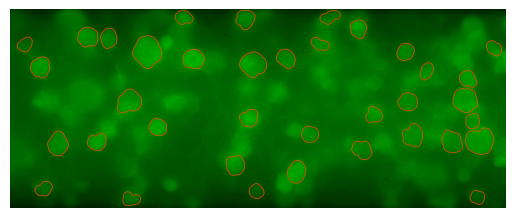

In [67]:
mmPerPixel = 1e-3/0.3135 # 4x long work distance

# Load image and convert to grayscale
Imorig = skio.imread('sample.png')
Im = rgb2gray(Imorig)
# print("Raw Image")
# plt.imshow(Im, cmap='gray')
# plt.show()

sigmaGauss = 5 # USER DEFINED
I = gaussian(Im, sigmaGauss)

# print("Take laplacian for edge detection")
lap = laplace(I)
lap = lap / np.max(lap)
# plt.imshow(lap, cmap='gray')
# plt.show()

# print("Threshold detected edges")
threshold = threshold_otsu(lap)
bw = lap > threshold
# plt.imshow(bw, cmap='gray')
# plt.show()

# print("First pass to clear small objects")
bw_cleared = remove_small_objects(bw,min_size=1600)
# plt.imshow(bw_cleared, cmap='gray')
# plt.show()

# print("Fill any holes")
bw_filled = binary_fill_holes(bw_cleared)
# plt.imshow(bw_filled, cmap='gray')
# plt.show()

# print("Remove thin straggly bits pass 1")
open_rad = 9
bw_opened = binary_opening(bw_filled, footprint=disk(open_rad))
# plt.imshow(bw_opened, cmap='gray')
# plt.show()

# print("Remove detached small objects")
bw_cleared2 = remove_small_objects(bw_opened, min_size=1500)
# plt.imshow(bw_cleared2, cmap='gray')
# plt.show()

# print("Remove thin straggly bits pass 2")
open_rad = 21
bw_opened2 = binary_opening(bw_cleared2, footprint=disk(open_rad))
# plt.imshow(bw_opened2, cmap='gray')
# plt.show()

# print("Remove detected areas that are too small")
minArea = 3500
bw_cleared3 = remove_small_objects(bw_opened2, min_size=minArea)
# plt.imshow(bw_cleared3, cmap='gray')
# plt.show()

# print("Label regions")
label_image = label(bw_cleared3)
image_label_overlay = label2rgb(label_image, image=Im, bg_label=0)
# plt.imshow(image_label_overlay)
# plt.show()

print("Final region boundaries")
orig_with_boundaries = mark_boundaries(Imorig, label_image, outline_color=(1,0,0))
plt.imshow(orig_with_boundaries)
plt.axis('off')
plt.savefig("output.png", bbox_inches="tight")
plt.show()

Raw Image


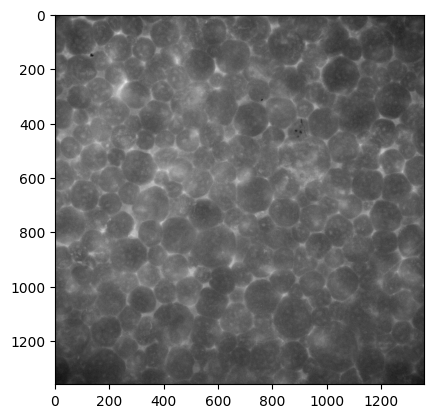

Take laplacian for edge detection


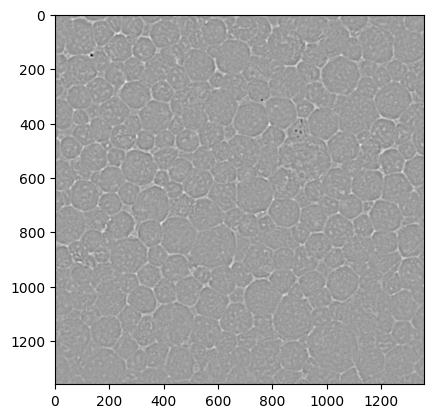

Threshold detected edges


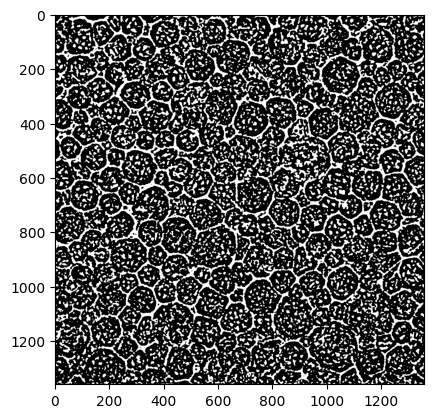

First pass to clear small objects


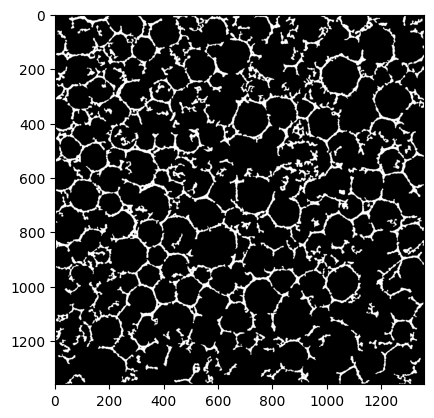

In [129]:
mmPerPixel = 1e-3/0.3135 # 4x long work distance

# Load image and convert to grayscale
img_dir = "NKX/sequence/"
frame_num = 100
img_name = "NKX_every_100_{:03d}.tif".format(frame_num)
img_path = img_dir + img_name

Imorig = skio.imread(img_path)
Im = Imorig
print("Raw Image")
plt.imshow(Im, cmap='gray')
plt.show()

sigmaGauss = 3 # USER DEFINED
I = gaussian(Im, sigmaGauss)

print("Take laplacian for edge detection")
lap = laplace(I)
lap = lap / np.max(lap)
plt.imshow(lap, cmap='gray')
plt.show()

print("Threshold detected edges")
threshold = threshold_otsu(lap)
bw = lap > threshold
plt.imshow(bw, cmap='gray')
plt.show()

print("First pass to clear small objects")
min_area = 300
bw_cleared = remove_small_objects(bw,min_size=min_area)
plt.imshow(bw_cleared, cmap='gray')
plt.show()

# print("Fill any holes")
# bw_filled = binary_fill_holes(bw_cleared)
# plt.imshow(bw_filled, cmap='gray')
# plt.show()

# print("Remove thin straggly bits pass 1")
# open_rad = 9
# bw_opened = binary_opening(bw_filled, footprint=disk(open_rad))
# plt.imshow(bw_opened, cmap='gray')
# plt.show()

# print("Remove detached small objects")
# bw_cleared2 = remove_small_objects(bw_opened, min_size=1500)
# plt.imshow(bw_cleared2, cmap='gray')
# plt.show()

# print("Remove thin straggly bits pass 2")
# open_rad = 21
# bw_opened2 = binary_opening(bw_cleared2, footprint=disk(open_rad))
# plt.imshow(bw_opened2, cmap='gray')
# plt.show()

# print("Remove detected areas that are too small")
# minArea = 3500
# bw_cleared3 = remove_small_objects(bw_opened2, min_size=minArea)
# plt.imshow(bw_cleared3, cmap='gray')
# plt.show()

# print("Label regions")
# label_image = label(bw_cleared3)
# image_label_overlay = label2rgb(label_image, image=Im, bg_label=0)
# plt.imshow(image_label_overlay)
# plt.show()

# print("Final region boundaries")
# orig_with_boundaries = mark_boundaries(Imorig*10, label_image, outline_color=(1,0,0))
# plt.imshow(orig_with_boundaries)
# plt.axis('off')
# plt.savefig("output.png", bbox_inches="tight")
# plt.show()

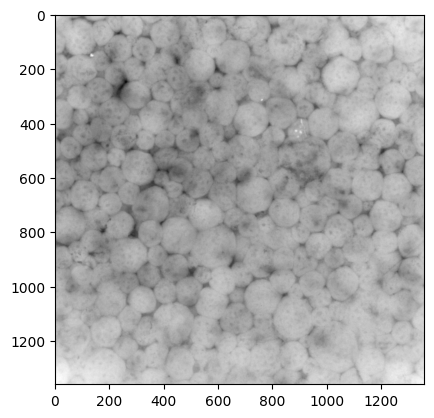

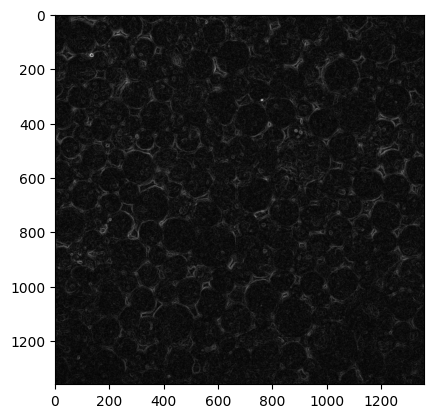

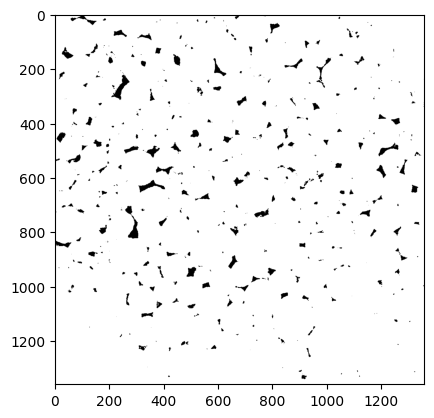

In [142]:
from skimage.filters import threshold_sauvola

# Imn = 1 - Im/np.max(Im)
In = np.max(I) - I
plt.imshow(In, cmap='gray')
plt.show()

from skimage.filters import sobel
plt.imshow(sobel(I), cmap='gray')
plt.show()

plt.imshow(In > threshold_sauvola(In, window_size=65), cmap='gray')
plt.show()

Raw Image


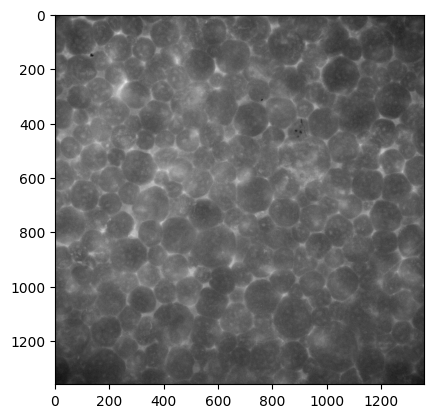

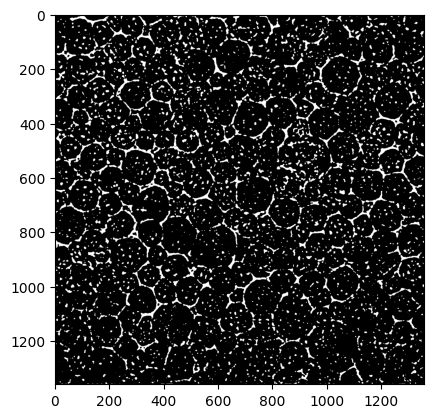

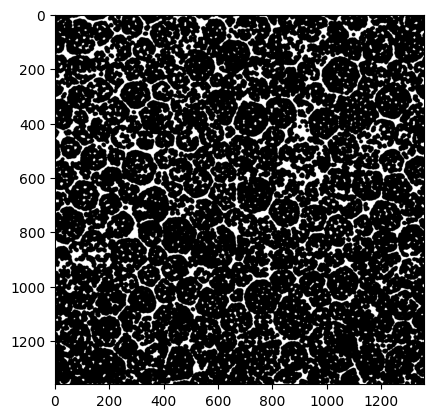

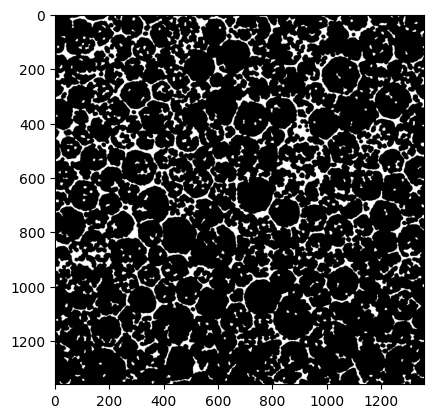

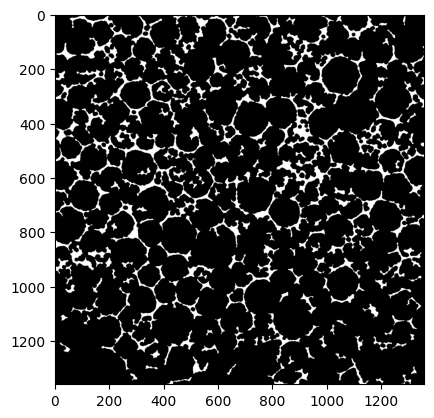

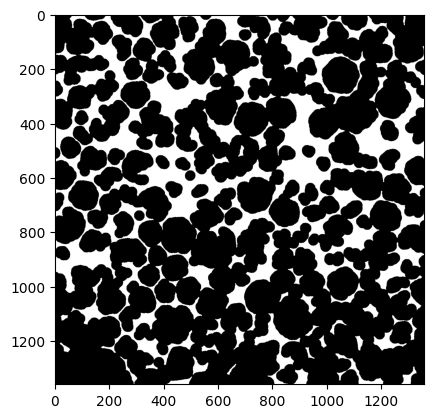

In [187]:
# Sobel + Watershed
from skimage.io import imread
from skimage.filters import (sobel, threshold_otsu)
from skimage.morphology import(binary_closing, disk, remove_small_objects, binary_dilation)

# Load image and convert to grayscale
img_dir = "NKX/sequence/"
frame_num = 100
img_name = "NKX_every_100_{:03d}.tif".format(frame_num)
img_path = img_dir + img_name

Imorig = imread(img_path)
Im = Imorig
If = Im / np.max(Im)
print("Raw Image")
plt.imshow(Im, cmap='gray')
plt.show()

sigmaGauss = 3 # USER DEFINED
I = gaussian(Im, sigmaGauss)

edges = laplace(I)
edges[edges < 0] = 0
# plt.imshow(edges, cmap='gray')
# plt.show()

thresh = threshold_otsu(edges)
bw = edges > thresh
plt.imshow(bw, cmap='gray')
plt.show()

close_rad = 7
bw_closed = binary_closing(bw, footprint=disk(close_rad))
plt.imshow(bw_closed, cmap='gray')
plt.show()

feature_area = 50
bw_cleared = remove_small_objects(bw_closed, min_size=feature_area)
plt.imshow(bw_cleared, cmap='gray')
plt.show()

feature_area = 200
bw_cleared = remove_small_objects(bw_closed, min_size=feature_area)
plt.imshow(bw_cleared, cmap='gray')
plt.show()

close_rad = 19
bw_closed = binary_closing(bw_cleared, footprint=disk(close_rad))
plt.imshow(bw_closed, cmap='gray')
plt.show()

Raw Image


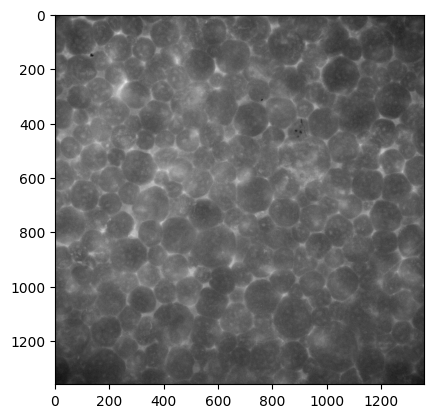

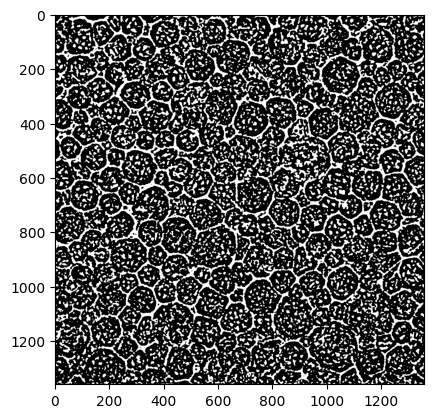

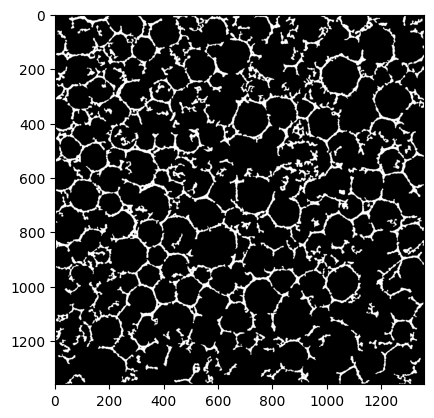

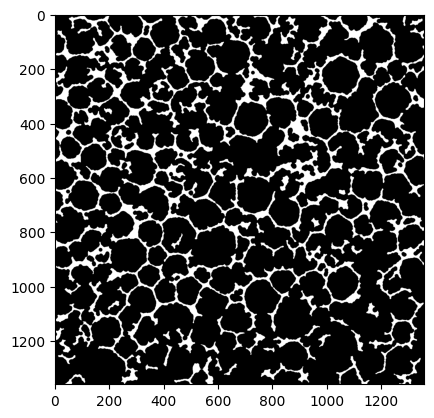

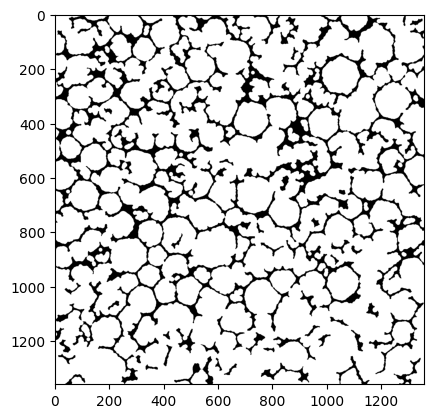

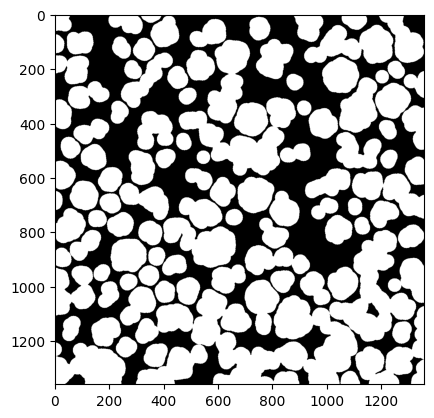

In [206]:
# Sobel + Watershed
from skimage.io import imread
from skimage.filters import (sobel, threshold_otsu)
from skimage.morphology import(binary_closing, disk, remove_small_objects, binary_dilation)

# Load image and convert to grayscale
img_dir = "NKX/sequence/"
frame_num = 100
img_name = "NKX_every_100_{:03d}.tif".format(frame_num)
img_path = img_dir + img_name

Imorig = imread(img_path)
Im = Imorig
If = Im / np.max(Im)
print("Raw Image")
plt.imshow(Im, cmap='gray')
plt.show()

sigmaGauss = 3 # USER DEFINED
I = gaussian(Im, sigmaGauss)

edges = laplace(I)
# plt.imshow(edges, cmap='gray')
# plt.show()

thresh = threshold_otsu(edges)
bw = edges > thresh
plt.imshow(bw, cmap='gray')
plt.show()

feature_area = 300
bw_cleared = remove_small_objects(bw, min_size=feature_area)
plt.imshow(bw_cleared, cmap='gray')
plt.show()

close_rad = 7
bw_closed = binary_closing(bw_cleared, footprint=disk(close_rad))
plt.imshow(bw_closed, cmap='gray')
plt.show()

wb = ~bw_closed
plt.imshow(wb, cmap='gray')
plt.show()

open_rad = 25
wb_opened = binary_opening(wb, footprint=disk(open_rad))
plt.imshow(wb_opened, cmap='gray')
plt.show()

# feature_area = 50
# bw_cleared = remove_small_objects(bw_closed, min_size=feature_area)
# plt.imshow(bw_cleared, cmap='gray')
# plt.show()

# feature_area = 200
# bw_cleared = remove_small_objects(bw_closed, min_size=feature_area)
# plt.imshow(bw_cleared, cmap='gray')
# plt.show()

# close_rad = 19
# bw_closed = binary_closing(bw_cleared, footprint=disk(close_rad))
# plt.imshow(bw_closed, cmap='gray')
# plt.show()

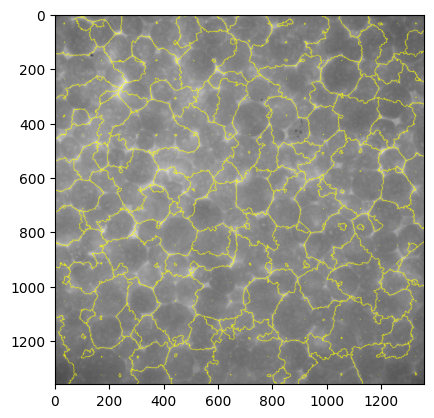

In [221]:
from skimage.segmentation import watershed
ws = watershed(Im, markers=400, compactness=0.1)

plt.imshow(mark_boundaries(If,ws), cmap='gray')
plt.show()

In [217]:
# Load image and convert to grayscale
from skimage.io import imread

# Load image and convert to grayscale
img_dir = "NKX/sequence/"
frame_num = 100
img_name = "NKX_every_100_{:03d}.tif".format(frame_num)
img_path = img_dir + img_name


import os
dir_list = os.listdir(img_dir)

first_image = imread(img_dir + dir_list[0])

print(dir_list)
print(len(dir_list))
print(first_image.shape)




import tifffile as tf
image = np.zeros((len(dir_list), first_image.shape[0], first_image.shape[1]), 'uint16')

for i in range(len(dir_list)):
    temp_img = imread(img_dir + dir_list[i])
    temp_img = temp_img / np.max(temp_img) * 65535
    image[i,:,:] = temp_img

tf.imsave('test1.tif', image)

['NKX_every_100_001.tif', 'NKX_every_100_002.tif', 'NKX_every_100_003.tif', 'NKX_every_100_004.tif', 'NKX_every_100_005.tif', 'NKX_every_100_006.tif', 'NKX_every_100_007.tif', 'NKX_every_100_008.tif', 'NKX_every_100_009.tif', 'NKX_every_100_010.tif', 'NKX_every_100_011.tif', 'NKX_every_100_012.tif', 'NKX_every_100_013.tif', 'NKX_every_100_014.tif', 'NKX_every_100_015.tif', 'NKX_every_100_016.tif', 'NKX_every_100_017.tif', 'NKX_every_100_018.tif', 'NKX_every_100_019.tif', 'NKX_every_100_020.tif', 'NKX_every_100_021.tif', 'NKX_every_100_022.tif', 'NKX_every_100_023.tif', 'NKX_every_100_024.tif', 'NKX_every_100_025.tif', 'NKX_every_100_026.tif', 'NKX_every_100_027.tif', 'NKX_every_100_028.tif', 'NKX_every_100_029.tif', 'NKX_every_100_030.tif', 'NKX_every_100_031.tif', 'NKX_every_100_032.tif', 'NKX_every_100_033.tif', 'NKX_every_100_034.tif', 'NKX_every_100_035.tif', 'NKX_every_100_036.tif', 'NKX_every_100_037.tif', 'NKX_every_100_038.tif', 'NKX_every_100_039.tif', 'NKX_every_100_040.tif',

C:\Users\rcmoo\AppData\Local\Temp\ipykernel_35444\3975125840.py:31: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tf.imsave('test1.tif', image)


In [2]:
# Load image and convert to grayscale
from skimage.io import imread
import numpy as np

# Load image and convert to grayscale
img_dir = "HEK/"
img_name = "HEK293_100gx2x5mininDMEM_1.nd2 - fewer and smaller.tif"
img_path = img_dir + img_name

imstack = imread(img_path, plugin="tifffile")
print(imstack.shape)

image = np.zeros(imstack.shape, 'uint16')
for i in range(imstack.shape[0]):
    temp_img = imstack[i,:,:]
    temp_img = temp_img / np.max(temp_img) * 65535
    image[i,:,:] = temp_img

import tifffile as tf
tf.imsave('test1.tif', image)

(104, 512, 512)


In [10]:
from skimage.filters import (sobel, laplace, threshold_otsu, gaussian)
from skimage.morphology import (remove_small_objects)

blurred = np.zeros(image.shape)
bw = np.zeros(image.shape)
sobel_image = np.zeros(image.shape)
sobel_bw = np.zeros(image.shape)
bw_cleared = np.zeros(image.shape)
for i in range(image.shape[0]):
    blurred[i,:,:] = gaussian(image[i,:,:], sigma=1)
    blurred[i,:,:] = blurred[i,:,:] / np.max(blurred[i,:,:]) * 65535

    bw[i,:,:] = blurred[i,:,:] > threshold_otsu(blurred[i,:,:])

    sobel_image[i,:,:] = sobel(blurred[i,:,:])
    # sobel_image[i,:,:] = sobel(imstack[i,:,:])
    # sobel_image[i,:,:] = sobel(image[i,:,:])

    sobel_image[i,:,:] = sobel_image[i,:,:] / np.max(sobel_image[i,:,:]) * 65535

    temp_bw = sobel_image[i,:,:] > threshold_otsu(sobel_image[i,:,:])
    sobel_bw[i,:,:] = temp_bw
    bw_cleared[i,:,:] = remove_small_objects(temp_bw, min_size = 20)

# print('min: {:}, max: {:}'.format(np.min(sobel_image), np.max(sobel_image)))
# sobel_image = sobel_image / np.max(sobel_image) * 65535
# print('min: {:}, max: {:}'.format(np.min(sobel_image), np.max(sobel_image)))

save_out = blurred.astype('uint16')
tf.imsave('blurred.tif', save_out)

save_out = bw.astype('uint16')
tf.imsave('bw.tif', save_out)

save_out = sobel_image.astype('uint16')
tf.imsave('sobel.tif', save_out)

save_out = sobel_bw.astype('uint16')
tf.imsave('sobel_bw.tif', save_out)

save_out = bw_cleared.astype('uint16')
tf.imsave('sobel_bw_cleared.tif', save_out)

C:\Users\rcmoo\AppData\Local\Temp\ipykernel_34972\4096195685.py:30: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tf.imsave('blurred.tif', save_out)
C:\Users\rcmoo\AppData\Local\Temp\ipykernel_34972\4096195685.py:33: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tf.imsave('bw.tif', save_out)
C:\Users\rcmoo\AppData\Local\Temp\ipykernel_34972\4096195685.py:36: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tf.imsave('sobel.tif', save_out)
C:\Users\rcmoo\AppData\Local\Temp\ipykernel_34972\4096195685.py:39: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tf.imsave('sobel_bw.tif', save_out)
C:\Users\rcmoo\AppData\Local\Temp\ipykernel_34972\4096195685.py:42: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tf.imsave('sobel_bw_cleared.tif', save_out)
